In [ ]:
#pip install matplotlib


In [8]:
import pandas as pd

# Load the Updated_Call_log.csv file
call_log_df = pd.read_csv('/Users/sebastianbayne/Documents/WBS/Bootcamp/Final_Project /Datasets /Call Center/Call_Center_Final/Updated_Call_log.csv')

# Display the first few rows of the dataframe
call_log_df.head()


Agent_ID            Call_Date  Talk_Time  After_Call_Work_Time  Queue_Time  \
0     32320  2017-01-01 00:00:00       1683                   320          14   
1     32240  2017-01-01 00:00:00        836                   184          16   
2     32410  2017-01-01 00:00:00       2098                   558          10   
3     26210  2017-01-01 00:00:00       1027                   290           2   
4     32320  2017-01-01 00:00:00       1283                   499           8   

  Call_resolution_ID Call_Type_ID Plan_ID  Emotion  
0        Resolution1       Type10   Plan3    anger  
1        Resolution1       Type30   Plan1  neutral  
2        Resolution2       Type40   Plan3    anger  
3        Resolution2       Type50   Plan5  neutral  
4        Resolution1       Type20   Plan8  neutral

In [9]:
# Load the User_experience.csv file
user_experience_df = pd.read_csv('/Users/sebastianbayne/Documents/WBS/Bootcamp/Final_Project /Datasets /Call Center/Call_Center_Final/User_experience.csv')

# Display the first few rows of the user experience dataframe
user_experience_df.head()


Agent_ID            Call_Date User_Experience
0     32430  2017-01-25 00:00:00       very good
1     26020  2017-01-26 00:00:00       very good
2     26010  2017-01-27 00:00:00       very good
3     26020  2017-01-27 00:00:00       very good
4     32040  2017-01-27 00:00:00       very good

In [10]:
# Merge the two dataframes on 'Agent_ID' and 'Call_Date'
merged_df = pd.merge(call_log_df, user_experience_df, on=['Agent_ID', 'Call_Date'], how='inner')

# Display the first few rows of the merged dataframe
merged_df.head()
# merged_df.info()
# merged_df.value_counts()

Agent_ID            Call_Date  Talk_Time  After_Call_Work_Time  Queue_Time  \
0     32430  2017-01-25 00:00:00       1990                   629          18   
1     32430  2017-01-25 00:00:00       2586                   530          12   
2     32430  2017-01-25 00:00:00       1388                   264           7   
3     32430  2017-01-25 00:00:00       1024                   272          13   
4     32430  2017-01-25 00:00:00       1496                   306           9   

  Call_resolution_ID Call_Type_ID Plan_ID  Emotion User_Experience  
0        Resolution1       Type20   Plan3  neutral       very good  
1        Resolution1       Type40   Plan1    anger       very good  
2        Resolution1       Type40   Plan6  neutral       very good  
3        Resolution2       Type10   Plan5    anger       very good  
4        Resolution1       Type30   Plan6  sadness       very good

In [11]:
# Generate a cross-tabulation between 'Emotion' and 'User_Experience'
emotion_experience_ct = pd.crosstab(merged_df['Emotion'], merged_df['User_Experience'])

emotion_experience_ct


User_Experience  excellent  good  very good
Emotion                                    
anger                  333   302       2049
fear                    62    61        351
happiness               63    68        438
neutral                599   586       3870
sadness                 40    45        383

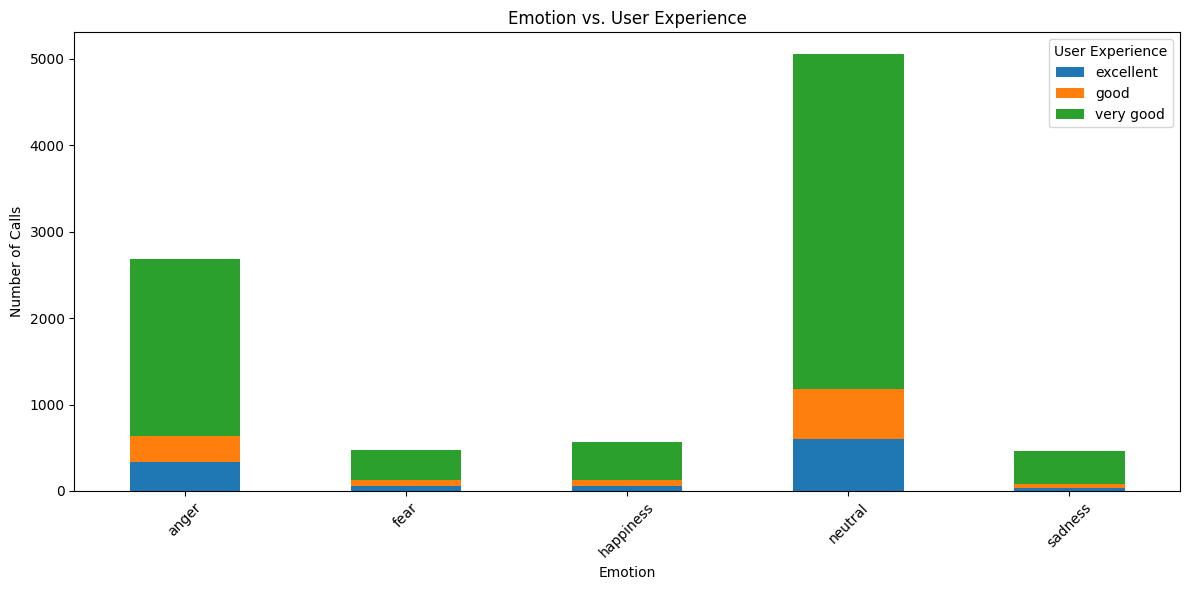

In [12]:
import matplotlib.pyplot as plt

# Plot the cross-tabulation
emotion_experience_ct.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Emotion vs. User Experience')
plt.ylabel('Number of Calls')
plt.xlabel('Emotion')
plt.xticks(rotation=45)
plt.legend(title='User Experience')
plt.tight_layout()

plt.show()


In [13]:
# Load the Call_Resolution_Type.csv file
resolution_type_df = pd.read_csv('/Users/sebastianbayne/Documents/WBS/Bootcamp/Final_Project /Datasets /Call Center/Call_Center_Final/Call_Resolution_Type.csv')

# Display the first few rows of the resolution type dataframe
resolution_type_df.head()


Call_resolution_ID Call_resolution_Description
0        Resolution1      Call resolved by agent
1        Resolution2  Transferred to other agent
2        Resolution3     Escalated to Supervisor
3        Resolution4                         NaN
4        Resolution5                         NaN

In [14]:
# Merge the merged_df with resolution_type_df on 'Call_resolution_ID'
merged_resolution_df = pd.merge(merged_df, resolution_type_df, on='Call_resolution_ID', how='left')

# Generate a cross-tabulation between 'Call_resolution_Description' and 'Emotion'
resolution_emotion_ct = pd.crosstab(merged_resolution_df['Call_resolution_Description'], merged_resolution_df['Emotion'])

resolution_emotion_ct


Emotion                      anger  fear  happiness  neutral  sadness
Call_resolution_Description                                          
Call resolved by agent        2007   365        415     3824      349
Escalated to Supervisor        267    47         64      531       53
Transferred to other agent     410    62         90      700       66

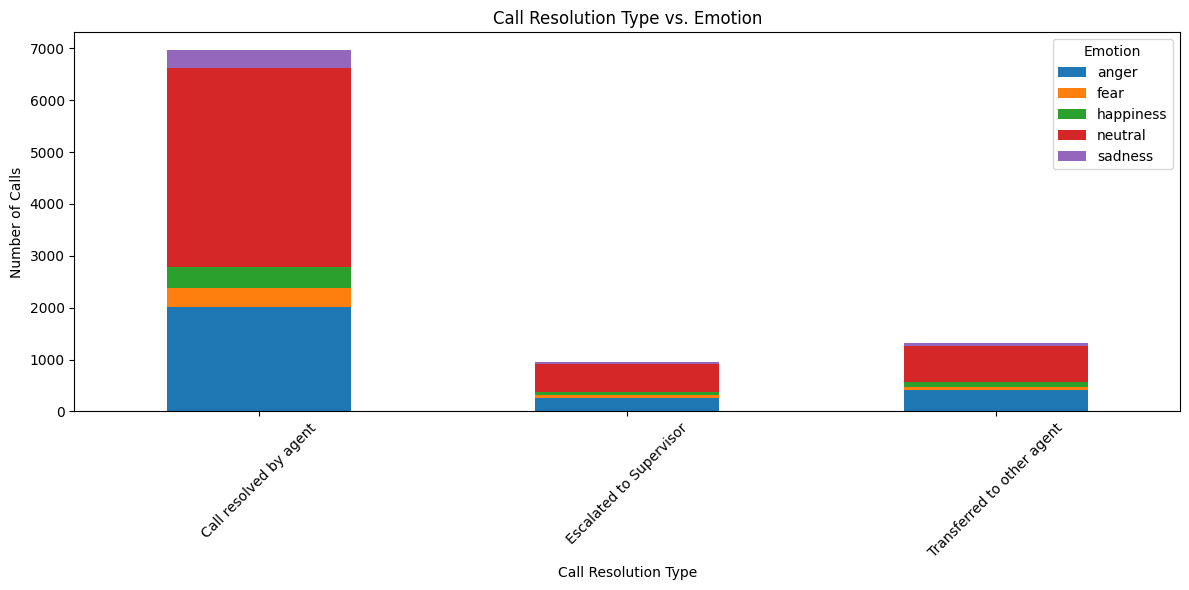

In [15]:
# Plot the cross-tabulation between resolution type and emotion
resolution_emotion_ct.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Call Resolution Type vs. Emotion')
plt.ylabel('Number of Calls')
plt.xlabel('Call Resolution Type')
plt.xticks(rotation=45)
plt.legend(title='Emotion')
plt.tight_layout()

plt.show()


In [16]:
# Convert the Call_Date column to datetime format
merged_df['Call_Date'] = pd.to_datetime(merged_df['Call_Date'])

# Check the first few rows after conversion
merged_df.head()

Agent_ID  Call_Date  Talk_Time  After_Call_Work_Time  Queue_Time  \
0     32430 2017-01-25       1990                   629          18   
1     32430 2017-01-25       2586                   530          12   
2     32430 2017-01-25       1388                   264           7   
3     32430 2017-01-25       1024                   272          13   
4     32430 2017-01-25       1496                   306           9   

  Call_resolution_ID Call_Type_ID Plan_ID  Emotion User_Experience  
0        Resolution1       Type20   Plan3  neutral       very good  
1        Resolution1       Type40   Plan1    anger       very good  
2        Resolution1       Type40   Plan6  neutral       very good  
3        Resolution2       Type10   Plan5    anger       very good  
4        Resolution1       Type30   Plan6  sadness       very good

In [17]:
# Group by Agent_ID, Call_Date, and Emotion and aggregate the count of each emotion
# 5 Agent_ID
emotion_counts = merged_df.groupby(['Agent_ID', 'Call_Date', 'Emotion']).size().reset_index(name='Count')

# Pivot the data to have Emotion as columns and Count as values
emotion_pivot = emotion_counts.pivot_table(index=['Agent_ID', 'Call_Date'], columns='Emotion', values='Count', fill_value=0).reset_index()

emotion_pivot.head(50)


Emotion  Agent_ID  Call_Date  anger  fear  happiness  neutral  sadness
0           14000 2017-02-01    6.0   0.0        0.0      6.0      3.0
1           14000 2017-05-10    6.0   1.0        0.0     15.0      0.0
2           14000 2017-06-21    5.0   0.0        0.0      7.0      4.0
3           14000 2017-10-10   12.0   0.0        1.0     18.0      1.0
4           14000 2017-11-03    4.0   1.0        0.0      9.0      1.0
5           14000 2017-11-13    5.0   1.0        1.0      9.0      3.0
6           14000 2017-11-24    3.0   0.0        1.0     13.0      2.0
7           14000 2017-11-30   12.0   3.0        2.0     10.0      1.0
8           14010 2017-06-14    2.0   0.0        1.0      5.0      1.0
9           14010 2017-10-25    4.0   1.0        1.0      6.0      1.0
10          14010 2017-11-03    4.0   0.0        0.0      7.0      2.0
11          14010 2017-11-08    3.0   0.0        1.0      6.0      1.0
12          14010 2017-11-30    1.0   1.0        0.0     10.0      0.0
13          14020 2017-02-20    9.0   2.0        2.0     11.0      1.0
14          14020 2017-05-18   10.0   3.0        0.0     13.0      0.0
15          14020 2017-08-10    3.0   0.0        2.0     16.0      2.0
16          14030 2017-05-15    4.0   1.0        0.0      7.0      0.0
17          14030 2017-06-05    4.0   1.0        2.0      4.0      0.0
18          14030 2017-07-27    5.0   0.0        3.0      8.0      0.0
19          14030 2017-08-29    5.0   1.0        0.0      5.0      2.0
20          14030 2017-11-20    2.0   4.0        2.0      4.0      1.0
21          14040 2017-05-11    9.0   4.0        2.0     13.0      1.0
22          14040 2017-08-22    8.0   0.0        1.0     12.0      1.0
23          14040 2017-10-12   11.0   0.0        0.0     12.0      3.0
24          14050 2017-03-08    1.0   1.0        2.0     11.0      0.0
25          14050 2017-04-06    1.0   1.0        0.0      8.0      1.0
26          14050 2017-10-04    6.0   1.0        0.0      8.0      1.0
27          14050 2017-11-10    6.0   1.0        2.0     10.0      1.0
28          14050 2017-12-01    5.0   1.0        1.0     10.0      1.0
29          14060 2017-04-11    6.0   1.0        1.0     16.0      2.0
30          14060 2017-05-15    6.0   2.0        1.0     12.0      3.0
31          14060 2017-11-20    6.0   1.0        1.0     16.0      3.0
32          14070 2017-02-16    4.0   1.0        1.0      9.0      0.0
33          14070 2017-04-04    1.0   1.0        1.0      9.0      0.0
34          14070 2017-04-27    5.0   0.0        0.0      6.0      1.0
35          14070 2017-07-13    3.0   1.0        0.0      5.0      1.0
36          14070 2017-08-03    1.0   1.0        0.0      5.0      0.0
37          14070 2017-08-07    5.0   1.0        0.0      6.0      1.0
38          14070 2017-08-21    2.0   0.0        0.0      6.0      0.0
39          14070 2017-09-19    1.0   1.0        0.0      4.0      0.0
40          14070 2017-11-06    3.0   0.0        1.0      6.0      0.0
41          14080 2017-02-13    8.0   0.0        1.0     22.0      1.0
42          14080 2017-03-24   10.0   1.0        1.0     10.0      0.0
43          14080 2017-03-28    7.0   2.0        0.0     10.0      2.0
44          14080 2017-04-14    7.0   0.0        0.0     11.0      1.0
45          14080 2017-07-10    5.0   2.0        3.0     10.0      0.0
46          14080 2017-09-07    7.0   0.0        2.0     12.0      1.0
47          14090 2017-03-17    4.0   0.0        1.0      9.0      0.0
48          14090 2017-04-03    6.0   1.0        0.0      8.0      0.0
49          14090 2017-04-05    2.0   0.0        2.0      7.0      1.0

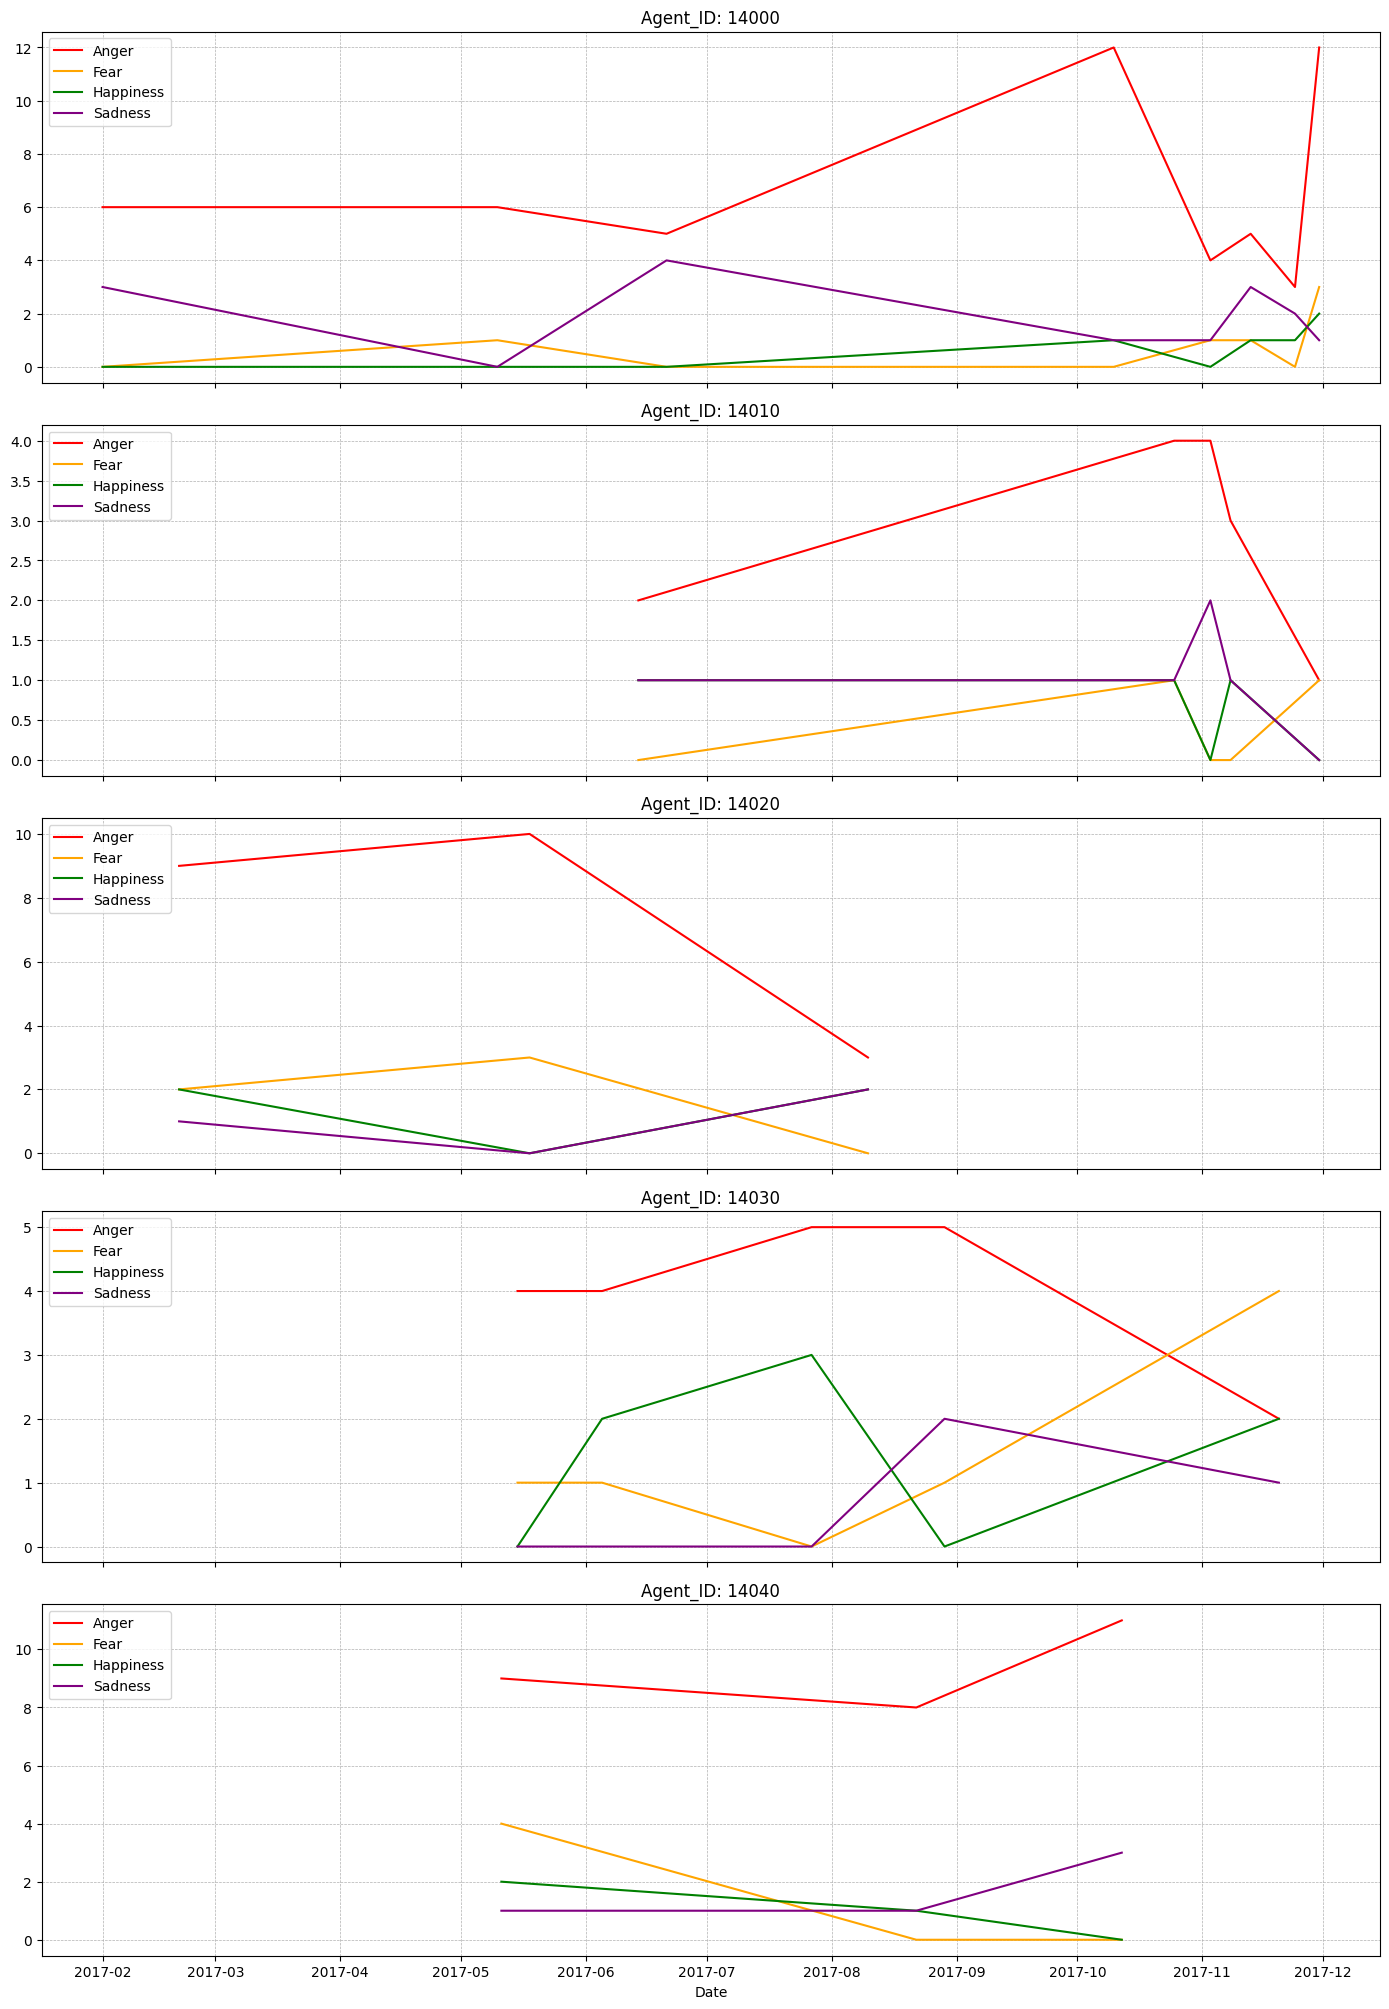

In [18]:
import matplotlib.pyplot as plt

# Select unique Agent_IDs
unique_agents = emotion_pivot['Agent_ID'].unique()

# Number of agents to visualize
num_agents = 5

# Set up the figure and axes
fig, axs = plt.subplots(num_agents, 1, figsize=(14, 20), sharex=True)

for idx, agent in enumerate(unique_agents[:num_agents]):
    subset = emotion_pivot[emotion_pivot['Agent_ID'] == agent]
    axs[idx].plot(subset['Call_Date'], subset['anger'], label='Anger', color='red')
    axs[idx].plot(subset['Call_Date'], subset['fear'], label='Fear', color='orange')
    axs[idx].plot(subset['Call_Date'], subset['happiness'], label='Happiness', color='green')
    # axs[idx].plot(subset['Call_Date'], subset['neutral'], label='Neutral', color='blue')
    axs[idx].plot(subset['Call_Date'], subset['sadness'], label='Sadness', color='purple')
    axs[idx].set_title(f'Agent_ID: {agent}')
    axs[idx].legend(loc='upper left')
    axs[idx].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.xlabel('Date')
plt.show()


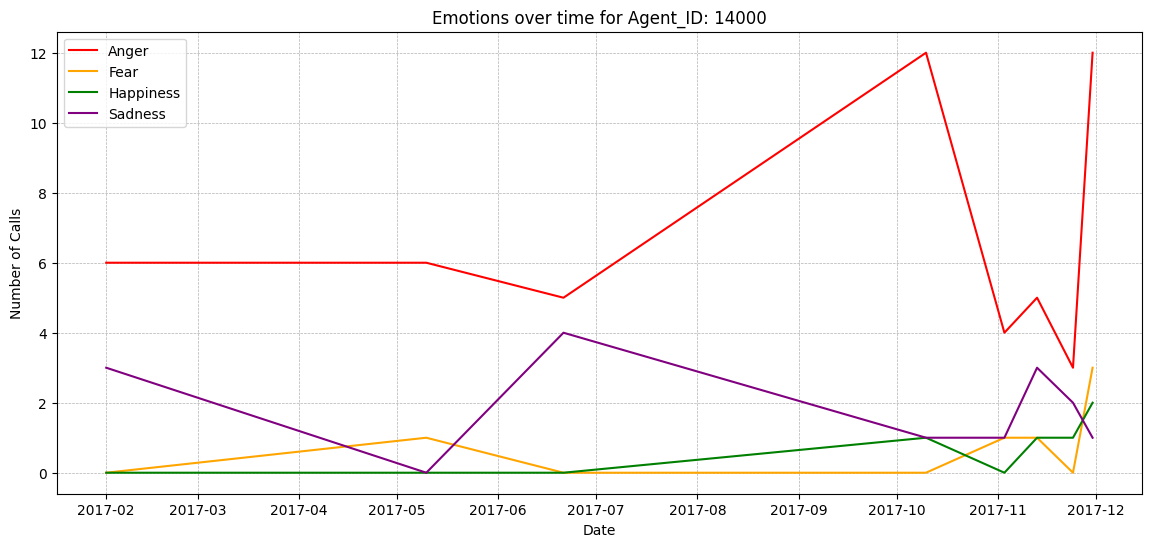

In [24]:
# Plotting the emotions over time for the first agent
subset = emotion_pivot[emotion_pivot['Agent_ID'] == unique_agents[0]]

plt.figure(figsize=(14, 6))
plt.plot(subset['Call_Date'], subset['anger'], label='Anger', color='red')
plt.plot(subset['Call_Date'], subset['fear'], label='Fear', color='orange')
plt.plot(subset['Call_Date'], subset['happiness'], label='Happiness', color='green')
plt.plot(subset['Call_Date'], subset['sadness'], label='Sadness', color='purple')
plt.title(f'Emotions over time for Agent_ID: {unique_agents[0]}')
plt.legend(loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.show()


In [ ]:
#pip install seaborn

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics for Talk_Time grouped by Emotion
desc_stats = merged_df.groupby('Emotion')['Talk_Time'].describe()
desc_stats

count        mean         std  min    25%    50%      75%     max
Emotion                                                                      
anger      2684.0  833.350969  576.097519  0.0  387.0  764.0  1156.00  2975.0
fear        474.0  830.907173  597.532463  0.0  385.5  748.0  1151.25  2906.0
happiness   569.0  828.873462  587.833970  0.0  385.0  748.0  1162.00  2961.0
neutral    5055.0  838.396044  580.729553  0.0  390.5  757.0  1160.00  3091.0
sadness     468.0  838.316239  576.440063  0.0  401.5  771.0  1161.00  2848.0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


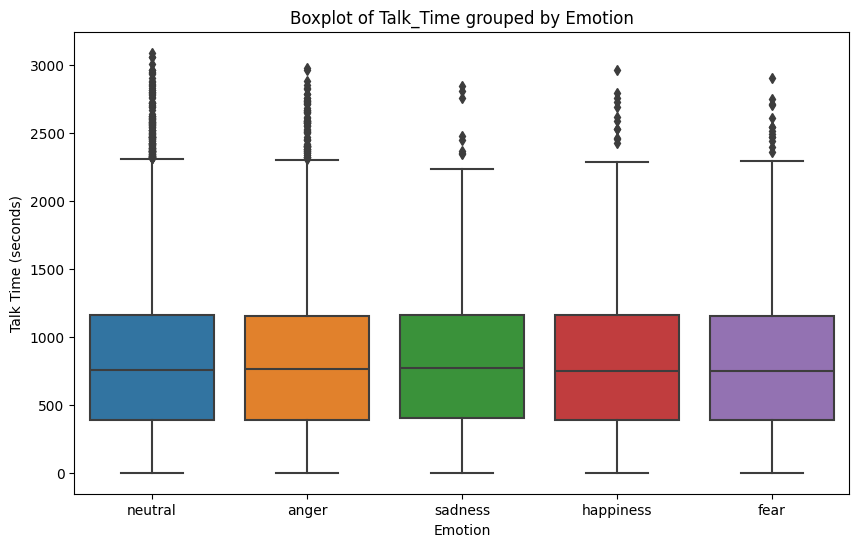

count        mean         std  min    25%    50%      75%     max
Emotion                                                                      
anger      2684.0  833.350969  576.097519  0.0  387.0  764.0  1156.00  2975.0
fear        474.0  830.907173  597.532463  0.0  385.5  748.0  1151.25  2906.0
happiness   569.0  828.873462  587.833970  0.0  385.0  748.0  1162.00  2961.0
neutral    5055.0  838.396044  580.729553  0.0  390.5  757.0  1160.00  3091.0
sadness     468.0  838.316239  576.440063  0.0  401.5  771.0  1161.00  2848.0

In [23]:
# Plotting boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Emotion', y='Talk_Time', data=merged_df)
plt.title("Boxplot of Talk_Time grouped by Emotion")
plt.ylabel("Talk Time (seconds)")
plt.xlabel("Emotion")
plt.show()

desc_stats

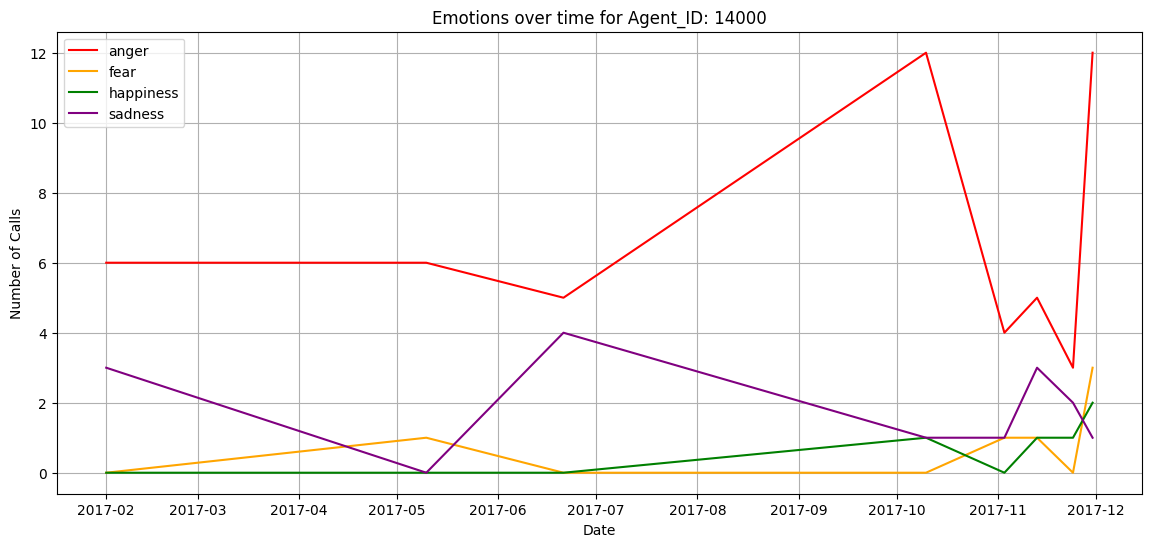

In [25]:
# Regenerate the emotion_pivot dataframe
emotion_counts = merged_df.groupby(['Agent_ID', 'Call_Date', 'Emotion']).size().reset_index(name='Count')
emotion_pivot = emotion_counts.pivot_table(index=['Agent_ID', 'Call_Date'], columns='Emotion', values='Count', fill_value=0).reset_index()

# Extract unique Agent_IDs for plotting
unique_agents = emotion_pivot['Agent_ID'].unique()

# Extracting data for the first agent and plotting
subset = emotion_pivot[emotion_pivot['Agent_ID'] == unique_agents[0]]

plt.figure(figsize=(14, 6))
for emotion, color in zip(['anger', 'fear', 'happiness', 'sadness'], ['red', 'orange', 'green', 'purple']):
    plt.plot(subset['Call_Date'], subset[emotion], label=emotion, color=color)

plt.title(f'Emotions over time for Agent_ID: {unique_agents[0]}')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.legend()
plt.grid(True)
plt.show()

Agent with most anger emotion attributed to their calls

In [28]:
# Grouping by Agent_ID and Emotion to count the number of occurrences for each emotion
emotion_counts_by_agent = call_log_df.groupby(['Agent_ID', 'Emotion']).size().unstack(fill_value=0)

# Adding a column for total calls by the agent
emotion_counts_by_agent['Total_Calls'] = emotion_counts_by_agent.sum(axis=1)

# Sorting agents by the number of 'anger' emotion and total calls
sorted_agents = emotion_counts_by_agent.sort_values(by=['anger', 'Total_Calls'], ascending=[False, False])

# Selecting the top agent based on the criteria
selected_agent_id = sorted_agents.index[0]
selected_agent_id


14240

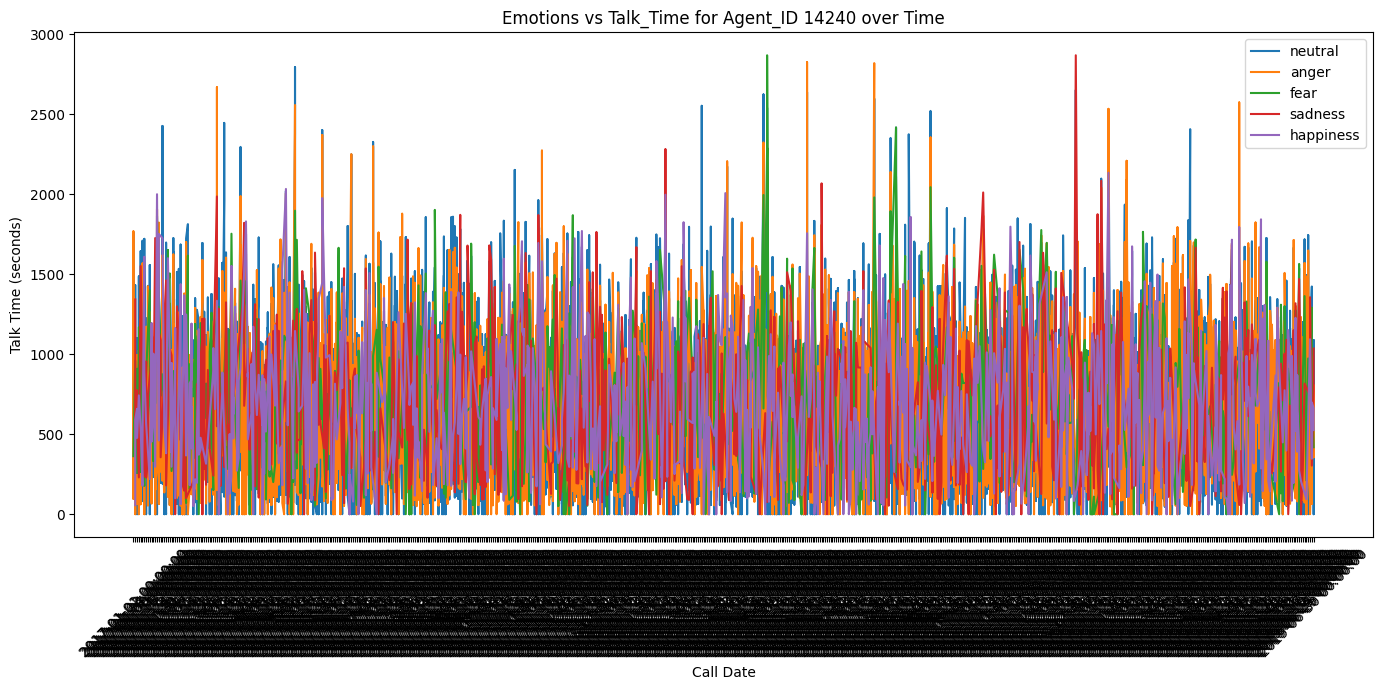

In [29]:
import matplotlib.pyplot as plt

# Filtering data for the selected agent
selected_agent_data = call_log_df[call_log_df['Agent_ID'] == selected_agent_id]

# Sorting data by Call_Date
selected_agent_data = selected_agent_data.sort_values(by='Call_Date')

# Plotting emotions vs Talk_Time over time
plt.figure(figsize=(14, 7))
for emotion in selected_agent_data['Emotion'].unique():
    subset = selected_agent_data[selected_agent_data['Emotion'] == emotion]
    plt.plot(subset['Call_Date'], subset['Talk_Time'], label=emotion)

plt.title(f"Emotions vs Talk_Time for Agent_ID {selected_agent_id} over Time")
plt.xlabel("Call Date")
plt.ylabel("Talk Time (seconds)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

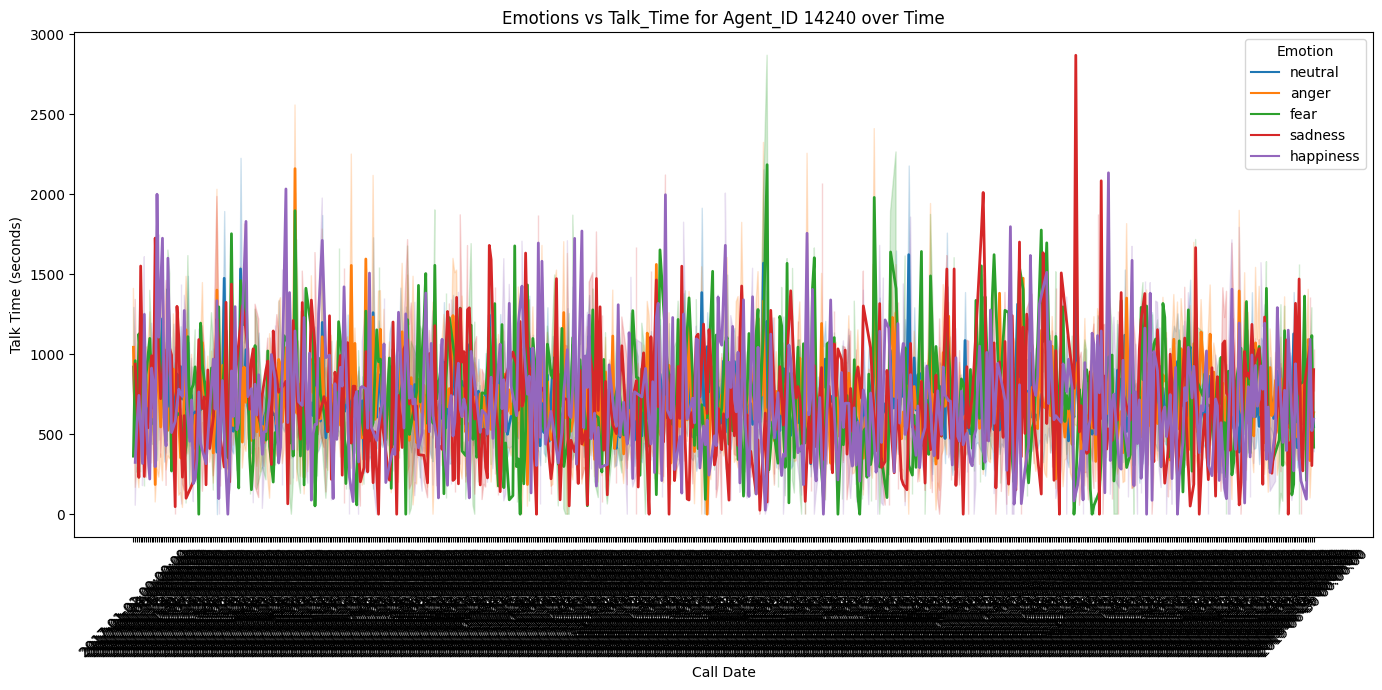

In [30]:
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.lineplot(data=selected_agent_data, x='Call_Date', y='Talk_Time', hue='Emotion', palette='tab10', lw=2)

plt.title(f"Emotions vs Talk_Time for Agent_ID {selected_agent_id} over Time")
plt.xlabel("Call Date")
plt.ylabel("Talk Time (seconds)")
plt.legend(title='Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

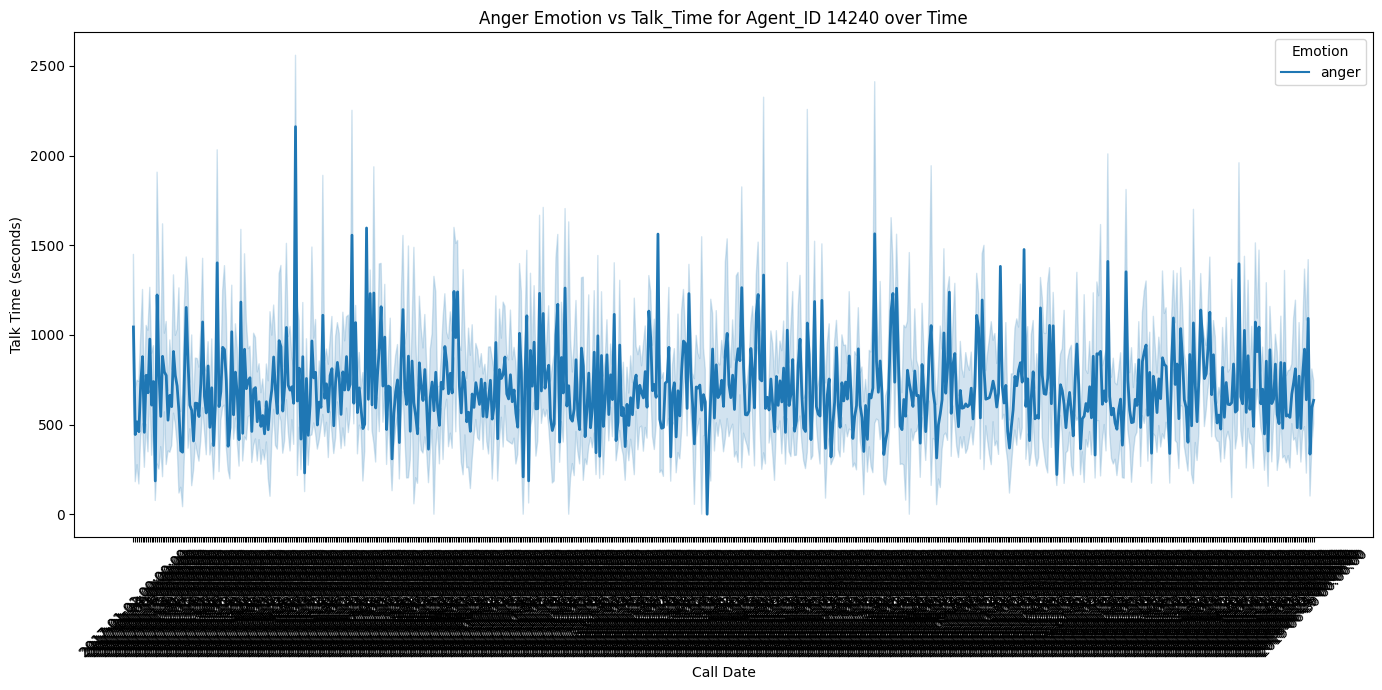

In [31]:
# Filtering data for the selected agent with "anger" emotion only
anger_data = selected_agent_data[selected_agent_data['Emotion'] == 'anger']

plt.figure(figsize=(14, 7))
sns.lineplot(data=anger_data, x='Call_Date', y='Talk_Time', hue='Emotion', lw=2)

plt.title(f"Anger Emotion vs Talk_Time for Agent_ID {selected_agent_id} over Time")
plt.xlabel("Call Date")
plt.ylabel("Talk Time (seconds)")
plt.legend(title='Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

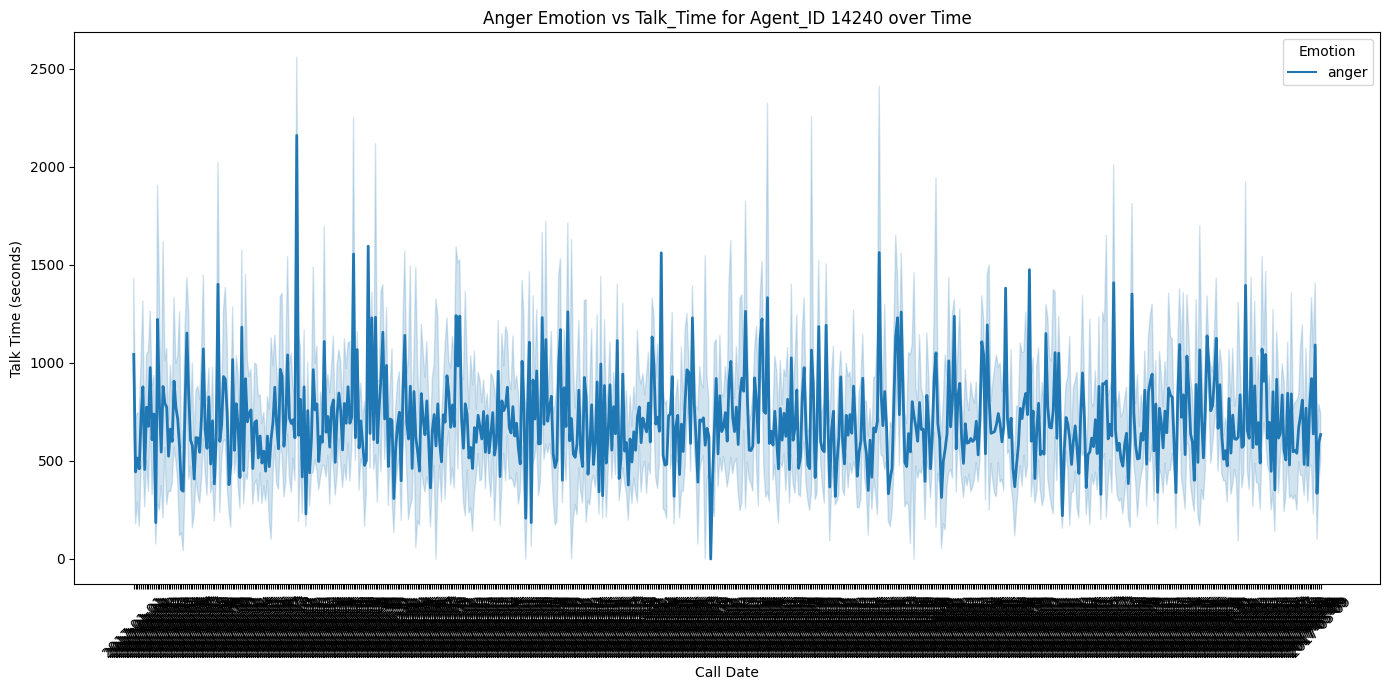

In [32]:
# Adjusting the plot to improve x-axis labeling
plt.figure(figsize=(14, 7))

# Using Seaborn to plot with improved date labels on x-axis
sns.lineplot(data=anger_data, x='Call_Date', y='Talk_Time', hue='Emotion', lw=2)

# Setting the title and labels
plt.title(f"Anger Emotion vs Talk_Time for Agent_ID {selected_agent_id} over Time")
plt.xlabel("Call Date")
plt.ylabel("Talk Time (seconds)")
plt.legend(title='Emotion')

# Adjusting x-axis ticks for better readability
plt.xticks(rotation=45, ticks=plt.xticks()[0], labels=[anger_data['Call_Date'].iloc[i].split(' ')[0] for i in plt.xticks()[0]])

plt.tight_layout()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

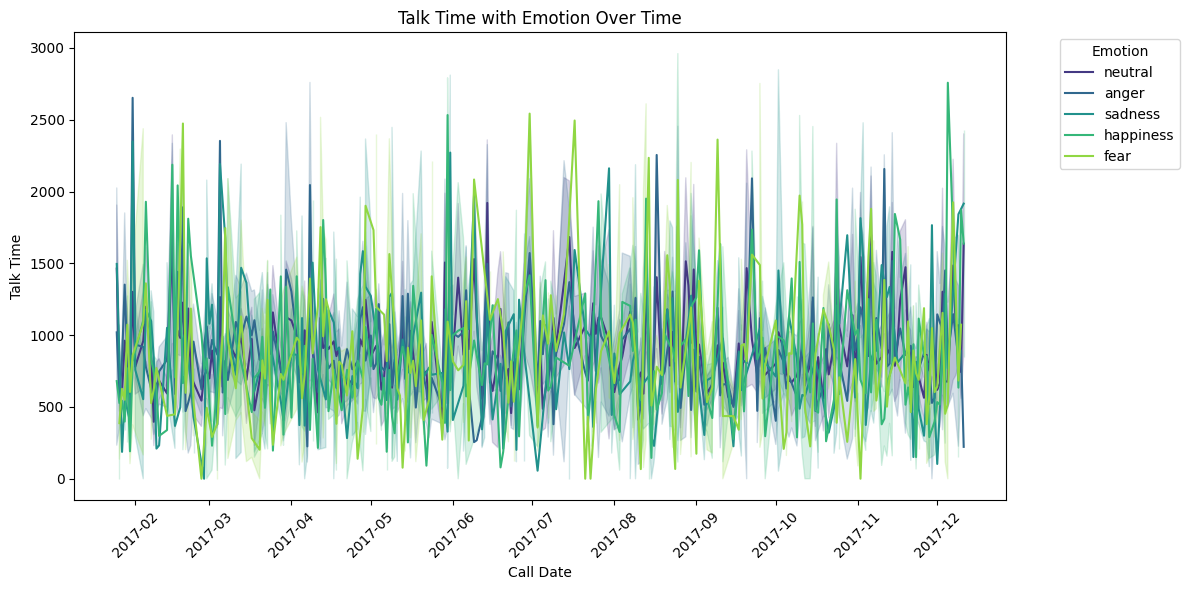

In [33]:
merged_df['Call_Date'] = pd.to_datetime(merged_df['Call_Date'])

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='Call_Date', y='Talk_Time', hue='Emotion', palette='viridis')
plt.xlabel('Call Date')
plt.ylabel('Talk Time')
plt.title('Talk Time with Emotion Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

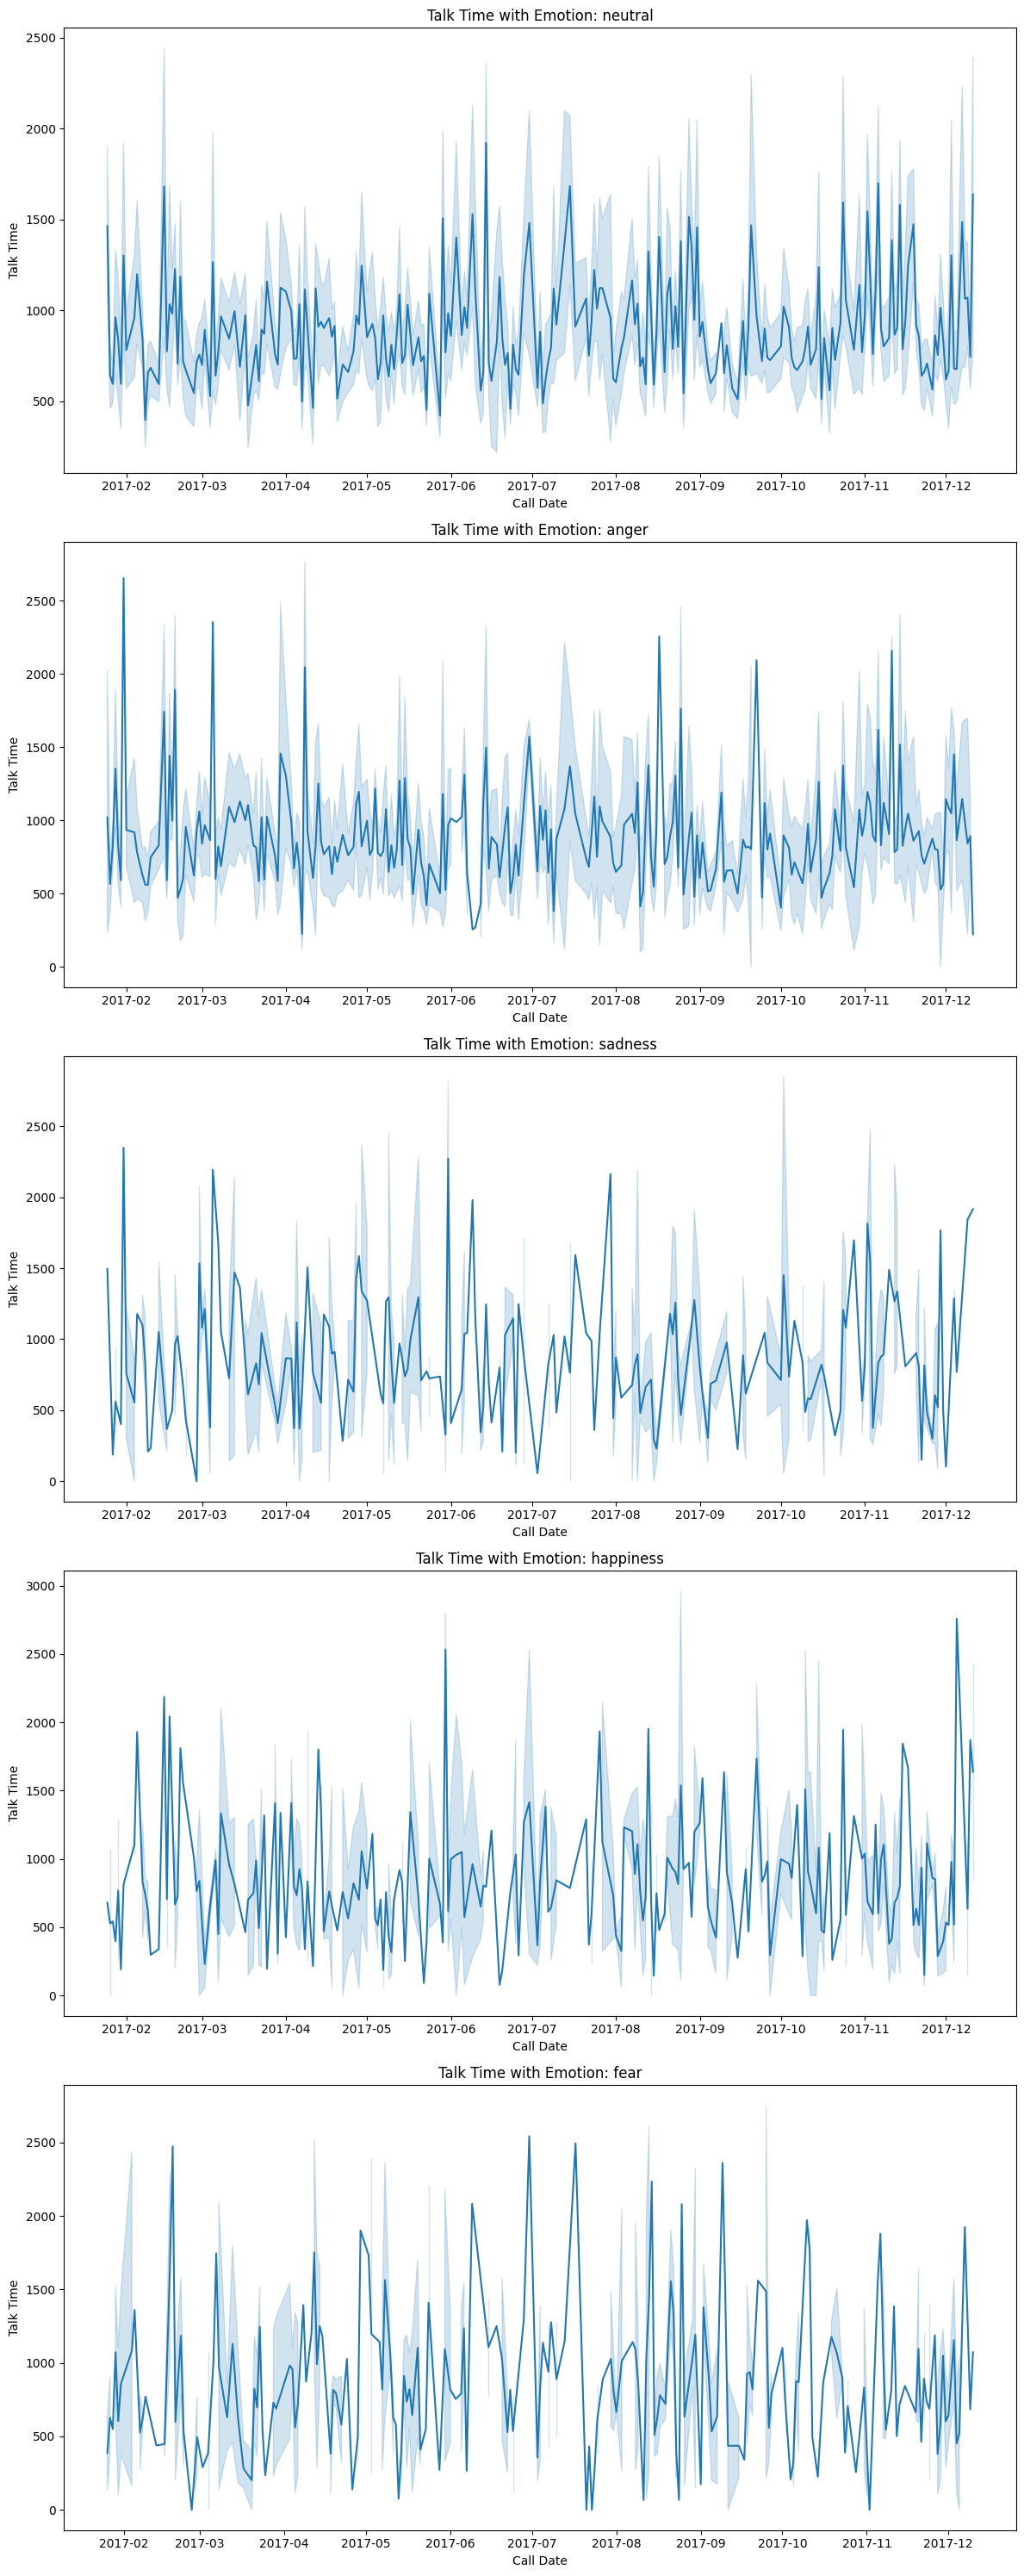

In [34]:
# Get unique emotions in the DataFrame
unique_emotions = merged_df['Emotion'].unique()

# Create subplots for each emotion
fig, axes = plt.subplots(nrows=len(unique_emotions), figsize=(12, 6 * len(unique_emotions)))

# Loop through each emotion and create a separate subplot
for i, emotion in enumerate(unique_emotions):
    ax = axes[i]
    
    # Filter the DataFrame for the current emotion
    subset_df = merged_df[merged_df['Emotion'] == emotion]
    
    # Create a line plot for 'Talk_Time' with the current emotion
    sns.lineplot(data=subset_df, x='Call_Date', y='Talk_Time', ax=ax)
    
    # Set the title and labels for the subplot
    ax.set_title(f'Talk Time with Emotion: {emotion}')
    ax.set_xlabel('Call Date')
    ax.set_ylabel('Talk Time')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: 

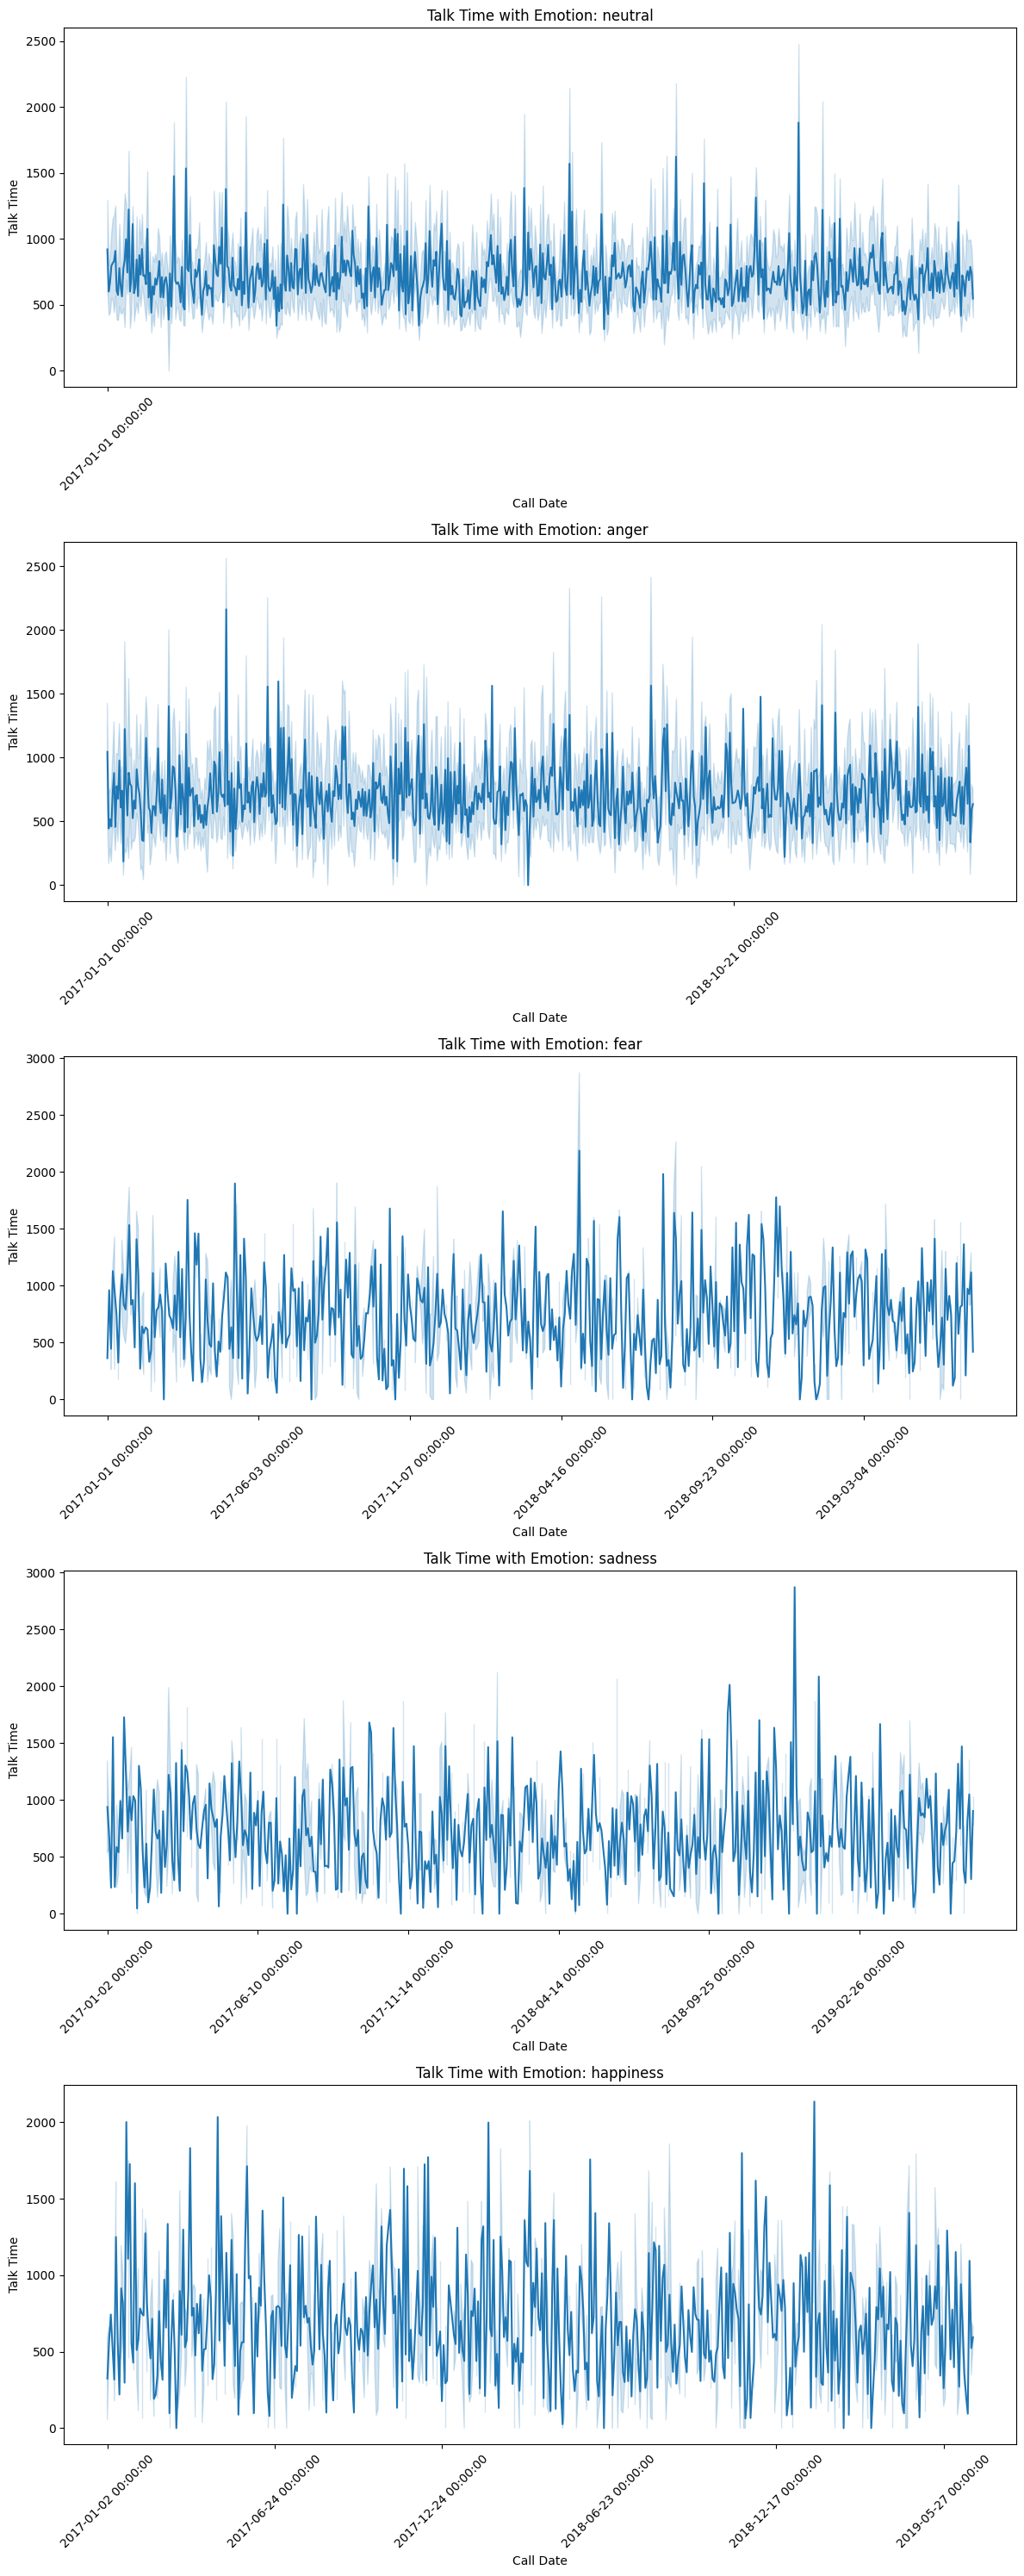

In [38]:
# Reducing the density of x-axis labels for better performance
fig, axes = plt.subplots(nrows=len(unique_emotions_agent), figsize=(12, 6 * len(unique_emotions_agent)))

# If there's only one unique emotion, axes will not be an array, so we need to handle that case
if len(unique_emotions_agent) == 1:
    axes = [axes]

# Loop through each emotion and create a separate subplot
for i, emotion in enumerate(unique_emotions_agent):
    ax = axes[i]
    
    # Filter the DataFrame for the current emotion
    subset_df = agent_data[agent_data['Emotion'] == emotion]
    
    # Create a line plot for 'Talk_Time' with the current emotion
    sns.lineplot(data=subset_df, x='Call_Date', y='Talk_Time', ax=ax)
    
    # Set the title and labels for the subplot
    ax.set_title(f'Talk Time with Emotion: {emotion}')
    ax.set_xlabel('Call Date')
    ax.set_ylabel('Talk Time')
    
    # Reduce the number of x-ticks for better performance and clarity
    ax.set_xticks(ax.get_xticks()[::int(len(subset_df)/10)])
    ax.tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


daily weekly monthly trends for anger

In [39]:
# Convert the 'Call_Date' column to datetime format
call_log_df['Call_Date'] = pd.to_datetime(call_log_df['Call_Date'])

# Extract day, week, and month from the 'Call_Date'
call_log_df['Day'] = call_log_df['Call_Date'].dt.date
call_log_df['Week'] = call_log_df['Call_Date'].dt.isocalendar().week
call_log_df['Month'] = call_log_df['Call_Date'].dt.month

# Filter the DataFrame for the "anger" emotion
anger_data = call_log_df[call_log_df['Emotion'] == 'anger']

# Group the data by day, week, and month and count the occurrences of the "anger" emotion
daily_counts = anger_data.groupby('Day').size()
weekly_counts = anger_data.groupby('Week').size()
monthly_counts = anger_data.groupby('Month').size()

daily_counts.head(), weekly_counts.head(), monthly_counts.head()


(Day
 2017-01-01    299
 2017-01-02    617
 2017-01-03    608
 2017-01-04    614
 2017-01-05    329
 dtype: int64,
 Week
 1    9281
 2    9274
 3    9382
 4    9237
 5    9415
 dtype: int64,
 Month
 1    42187
 2    37285
 3    40661
 4    40185
 5    41828
 dtype: int64)

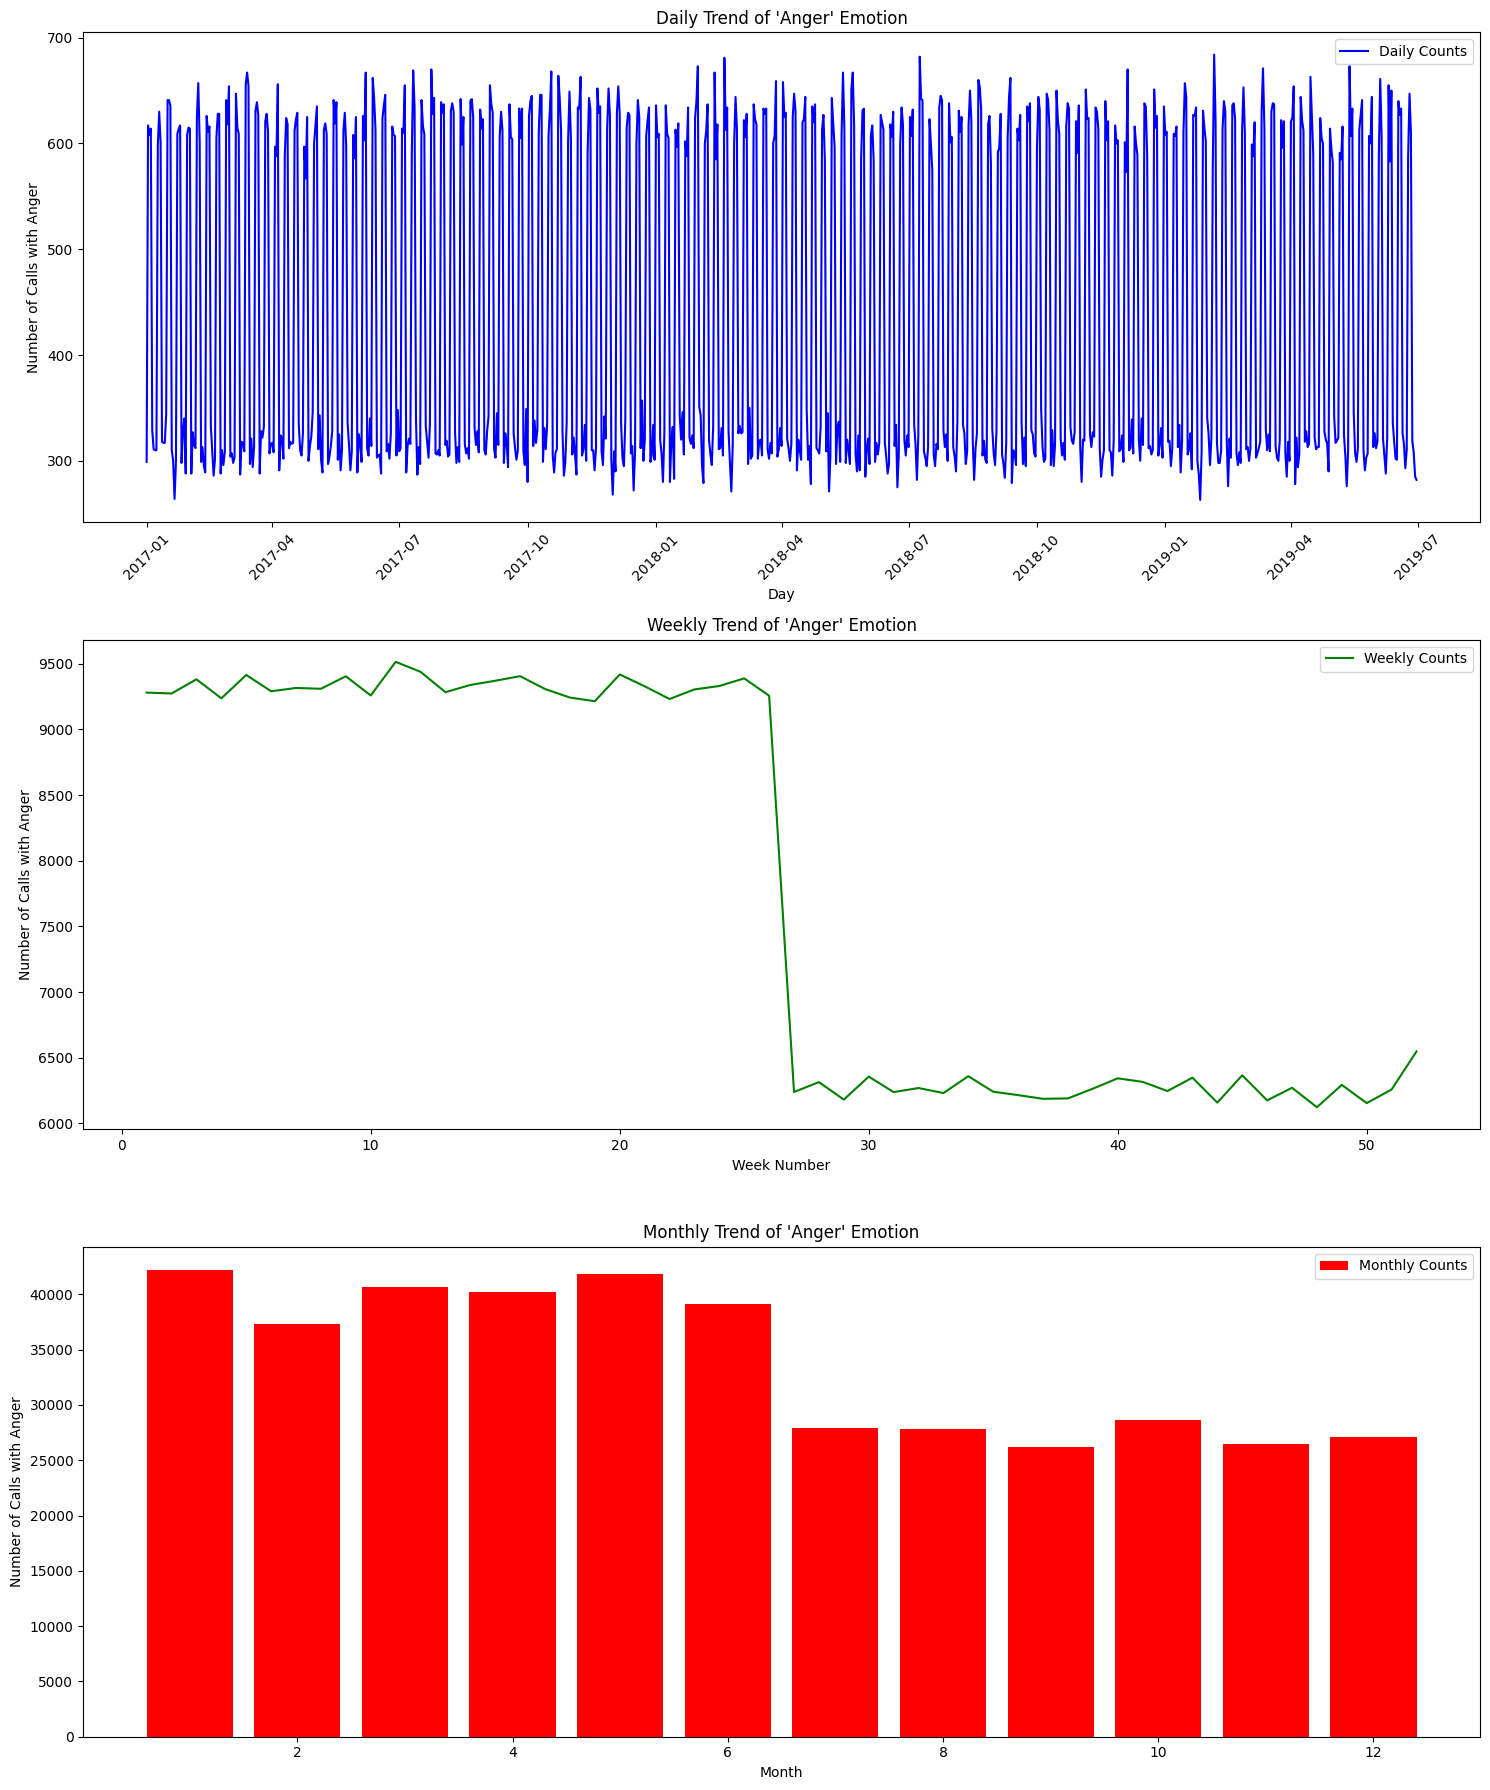

In [40]:
# Plotting the trends
fig, axes = plt.subplots(nrows=3, figsize=(15, 18))

# Daily trend
axes[0].plot(daily_counts.index, daily_counts.values, label='Daily Counts', color='blue')
axes[0].set_title("Daily Trend of 'Anger' Emotion")
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Number of Calls with Anger')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Weekly trend
axes[1].plot(weekly_counts.index, weekly_counts.values, label='Weekly Counts', color='green')
axes[1].set_title("Weekly Trend of 'Anger' Emotion")
axes[1].set_xlabel('Week Number')
axes[1].set_ylabel('Number of Calls with Anger')
axes[1].legend()

# Monthly trend
axes[2].bar(monthly_counts.index, monthly_counts.values, label='Monthly Counts', color='red')
axes[2].set_title("Monthly Trend of 'Anger' Emotion")
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Number of Calls with Anger')
axes[2].legend()

plt.tight_layout()
plt.show()
